<a href="https://colab.research.google.com/github/34-anish/Assignment/blob/main/Hack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from datetime import datetime ,timedelta
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv('GlobalLandTemperaturesByState.csv')

In [ ]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [ ]:
df.isnull().sum()

dt                                  0
AverageTemperature               7148
AverageTemperatureUncertainty    7149
State                               1
Country                             1
dtype: int64

In [ ]:
df[df.isna().any(axis=1)]

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
14,1856-07-01,NaN,NaN,Acre,Brazil
20,1857-01-01,NaN,NaN,Acre,Brazil
21,1857-02-01,NaN,NaN,Acre,Brazil
22,1857-03-01,NaN,NaN,Acre,Brazil
23,1857-04-01,NaN,NaN,Acre,Brazil
...,...,...,...,...,...
193346,2013-09-01,NaN,NaN,Jharkhand,India
195419,2013-09-01,NaN,NaN,Jiangsu,China
197492,2013-09-01,NaN,NaN,Jiangxi,China
197639,1832-10-01,NaN,NaN,Jilin,China


In [ ]:
df= df.dropna(how='any',axis=0)

In [ ]:
df.shape

(192159, 5)

In [ ]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [ ]:
df = df.rename(columns ={'dt':'Date','AverageTemperature':'Avg_temp','AverageTemperatureUncertainity':'confidence_interval_tempb'})

In [ ]:
df.dtypes


Date                              object
Avg_temp                         float64
AverageTemperatureUncertainty    float64
State                             object
Country                           object
dtype: object

Changing the Date of data type object to the date type

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df

,Date,Avg_temp,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil
...,...,...,...,...,...
199302,1971-05-01,13.160,0.140,Jilin,China
199303,1971-06-01,18.893,0.177,Jilin,China
199304,1971-07-01,21.117,0.319,Jilin,China
199305,1971-08-01,20.114,0.205,Jilin,China


In [ ]:
df.dtypes

Date                             datetime64[ns]
Avg_temp                                float64
AverageTemperatureUncertainty           float64
State                                    object
Country                                  object
dtype: object

In [ ]:
df.set_index('Date',inplace = True)

In [ ]:
df.describe()

,Avg_temp,AverageTemperatureUncertainty
count,192159.000000,192159.000000
mean,11.497153,1.155255
std,13.716508,1.200633
min,-44.736000,0.036000
25%,3.183000,0.316500
50%,14.224000,0.622000
75%,22.643000,1.613000
max,36.339000,11.631000


In [ ]:
df['Year'] = df.index.year
df.head()

,Avg_temp,AverageTemperatureUncertainty,State,Country,Year
Date,,,,,
1855-05-01,25.544,1.171,Acre,Brazil,1855
1855-06-01,24.228,1.103,Acre,Brazil,1855
1855-07-01,24.371,1.044,Acre,Brazil,1855
1855-08-01,25.427,1.073,Acre,Brazil,1855
1855-09-01,25.675,1.014,Acre,Brazil,1855


In [ ]:
latest_df = df.loc['1980':'2013']
latest_df

,Avg_temp,AverageTemperatureUncertainty,State,Country,Year
Date,,,,,
1980-01-01,26.652,0.190,Acre,Brazil,1980
1980-02-01,26.495,0.495,Acre,Brazil,1980
1980-03-01,26.270,0.236,Acre,Brazil,1980
1980-04-01,26.430,0.201,Acre,Brazil,1980
1980-05-01,25.802,0.882,Acre,Brazil,1980
...,...,...,...,...,...
2013-04-01,17.448,0.568,Jiangxi,China,2013
2013-05-01,23.417,0.686,Jiangxi,China,2013
2013-06-01,26.484,0.389,Jiangxi,China,2013


In [ ]:
latest_df[['Country','Avg_temp']].groupby(['Country']).mean().sort_values('Avg_temp')

,Avg_temp
Country,
Canada,1.075977
Russia,1.923422
Australia,12.152389
United States,12.904658
China,15.189848
India,22.082490
Brazil,25.150331


#Year vs Avg_temp

In [ ]:
latest_df.shape

(31528, 5)

In [ ]:
# plt.figure(figsize=(9,4))
# sns.lineplot(x="Year",y="Avg_temp",data=latest_df)  
# plt.plot()

In [ ]:
resample_df = latest_df[['Avg_temp']].resample('A').mean()

In [ ]:
resample_df.head()

,Avg_temp
Date,
1980-12-31,12.110379
1981-12-31,12.520941
1982-12-31,12.181512
1983-12-31,12.429699
1984-12-31,11.985368


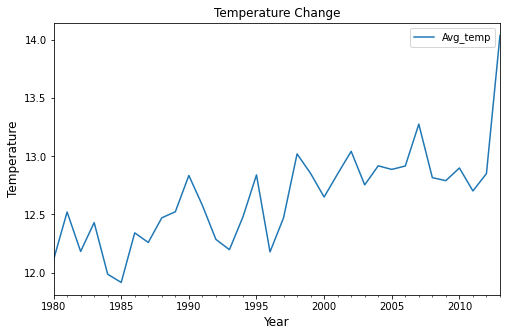

In [ ]:
resample_df.plot(title='Temperature Change',figsize=(8,5))
plt.ylabel('Temperature',fontsize=12)
plt.xlabel('Year',fontsize=12)
plt.legend()

In [ ]:
from statsmodels.tsa.stattools import adfuller
print('Dickey Fuller Test Results:')
test_df = adfuller(resample_df.iloc[:,0].values,autolag = 'AIC')
df_output = pd.Series(test_df[0:4],index=['Test Statisitc','p-value','Lags Used','Number of Observations Used'])
for key,value in test_df[4].items():
  df_output['Critical Value (%s)' %key] = value
print(df_output)

Dickey Fuller Test Results:
Test Statisitc                  0.064605
p-value                         0.963560
Lags Used                      10.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64


In [ ]:
decomp =  (resample_df,freq=3)
trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid

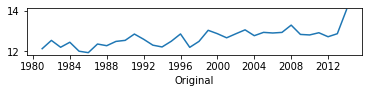

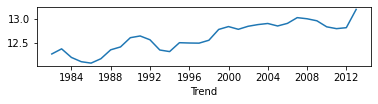

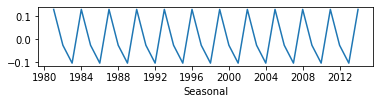

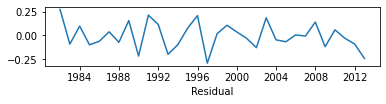

<Figure size 432x360 with 0 Axes>

In [ ]:
plt.subplot(411)
plt.plot(resample_df)
plt.xlabel('Original')
plt.figure(figsize=(6,5))

plt.subplot(412)
plt.plot(trend)
plt.xlabel('Trend')
plt.figure(figsize=(6,5))

plt.subplot(413)
plt.plot(seasonal)
plt.xlabel('Seasonal')
plt.figure(figsize=(6,5))

plt.subplot(414)
plt.plot(residual)
plt.xlabel('Residual')
plt.figure(figsize=(6,5))
plt.tight_layout()

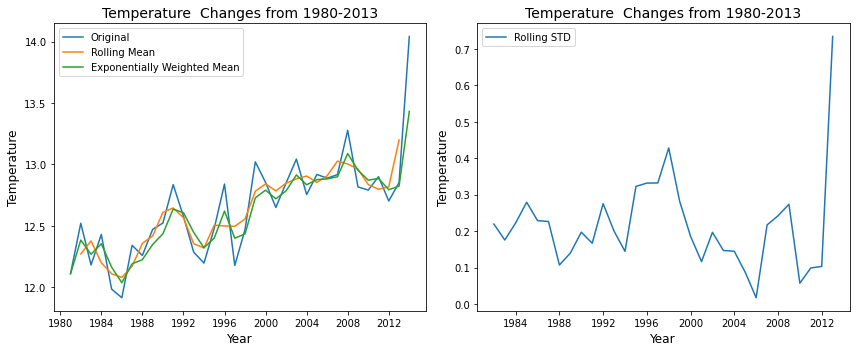

In [ ]:
rol_mean = resample_df.rolling(window=3,center = True).mean()
ewm = resample_df.ewm(span=3).mean()
rol_std  =  resample_df.rolling(window=3,center = True).std()
fig , (ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
ax1.plot(resample_df,label='Original')
ax1.plot(rol_mean,label='Rolling Mean')
ax1.plot(ewm,label='Exponentially Weighted Mean')
ax1.set_title('Temperature  Changes from 1980-2013',fontsize =14)
ax1.set_ylabel('Temperature',fontsize=12)
ax1.set_xlabel('Year',fontsize=12)
ax1.legend()

ax2.plot(rol_std,label='Rolling STD')
ax2.set_title('Temperature  Changes from 1980-2013',fontsize=14)
ax2.set_ylabel('Temperature',fontsize=12)
ax2.set_xlabel('Year',fontsize=12)
ax2.legend()

plt.tight_layout()
plt.show()


In [ ]:
rol_mean.dropna(inplace = True)
ewm.dropna(inplace=True)
print('Dickey-Fuller Test for the Rolling Mean:')
df_test = adfuller(rol_mean.iloc[:,0].values,autolag='AIC')
df_output = pd.Series(df_test[0:4],index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
for key,value in df_test[4].items():
  df_output['Critical Value (%s)'%key] = value
print(df_output)
print('')
print('Dickey-Fuller Test for the EWM:')
df_test = adfuller(ewm.iloc[:,0].values,autolag ='AIC')
df_output = pd.Series(df_test[0:4],index =['Test Statistic','p-value','Lags Used','Number Of Observations Used'])
for key,value in df_test[4].items():
  df_output['Critcal Value (%s)'%key] = value
print(df_output)

Dickey-Fuller Test for the Rolling Mean:
Test Statistic                  0.111296
p-value                         0.966824
Lags Used                       8.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64

Dickey-Fuller Test for the EWM:
Test Statistic                  0.314748
p-value                         0.978011
Lags Used                      10.000000
Number Of Observations Used    23.000000
Critcal Value (1%)             -3.752928
Critcal Value (5%)             -2.998500
Critcal Value (10%)            -2.638967
dtype: float64


In [ ]:
diff_rol_mean = resample_df - rol_mean
diff_rol_mean.dropna(inplace=True)
diff_rol_mean.head()

,Avg_temp
Date,
1981-12-31,0.249997
1982-12-31,-0.195872
1983-12-31,0.230839
1984-12-31,-0.124516
1985-12-31,-0.165912


In [ ]:
diff_ewm = resample_df - ewm
diff_ewm.dropna(inplace=True)
diff_ewm.head()

,Avg_temp
Date,
1980-12-31,0.000000
1981-12-31,0.136854
1982-12-31,-0.086818
1983-12-31,0.075305
1984-12-31,-0.178561


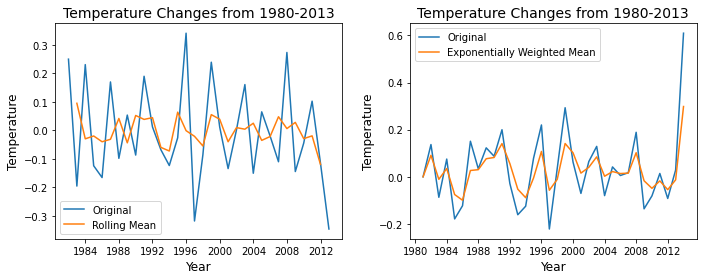

In [ ]:
df_rol_mean_diff = diff_rol_mean.rolling(window=3,center=True).mean()
df_ewm_diff = diff_ewm.ewm(span=3).mean()
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
ax1.plot(diff_rol_mean,label='Original')
ax1.plot(df_rol_mean_diff,label='Rolling Mean')
ax1.set_title('Temperature Changes from 1980-2013',fontsize=14)
ax1.set_ylabel('Temperature',fontsize = 12)
ax1.set_xlabel('Year',fontsize=12)
ax1.legend()

ax2.plot(diff_ewm,label='Original')
ax2.plot(df_ewm_diff,label="Exponentially Weighted Mean")
ax2.set_title('Temperature Changes from 1980-2013',fontsize = 14)
ax2.set_ylabel('Temperature',fontsize = 12)
ax2.set_xlabel('Year',fontsize = 12)
ax2.legend()
plt.tight_layout()

In [ ]:
print('Dickey-Fuller Test for the Difference between the Original and Rolling Mean:')
dftest = adfuller(diff_rol_mean.iloc[:,0].values,autolag = 'AIC')
dfoutput = pd.Series(dftest[0:4],index =['Test Statistic','p-value','#Lags Used','Number Of Observations Used'])
for key,value in dftest[4].items():
  dfoutput['Critical Value (%s)'%key] = value
print(df_output)
print('')
print('Dickey-Fuller Test for the Difference between the Original and EWM:')
dftest = adfuller(diff_ewm.iloc[:,0].values,autolag = 'AIC')
dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key , value in dftest[4].items():
  dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller Test for the Difference between the Original and Rolling Mean:
Test Statistic                  0.314748
p-value                         0.978011
Lags Used                      10.000000
Number Of Observations Used    23.000000
Critcal Value (1%)             -3.752928
Critcal Value (5%)             -2.998500
Critcal Value (10%)            -2.638967
dtype: float64

Dickey-Fuller Test for the Difference between the Original and EWM:
Test Statistic                 -1.724245
p-value                         0.418666
#Lags Used                     10.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
from matplotlib import pyplot

#Plotting the autocorrelationg and partial autocorrelation graphs

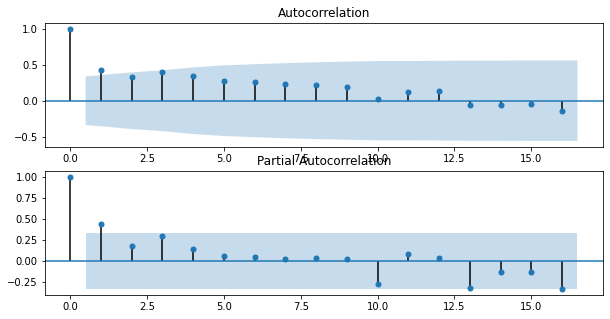

In [ ]:
pyplot.figure(figsize = (10,5))
pyplot.subplot(211)
plot_acf(resample_df,ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(resample_df,ax=pyplot.gca())
pyplot.show()
